In [244]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

# Data Load

In [245]:
store_data=pd.read_csv(filepath_or_buffer='/home/abhi/Downloads/store.csv',parse_dates=['Date'])
store_data.head(5)

,Date,Item,$ Buying Price (For store),$ Marked Price (For Store),ItemSold/Measure,State Code,Free Items
0,2005-10-04,1003,138.41,142.15,242.15,3003,1
1,2005-10-11,1004,135.01,140.91,240.91,3003,1
2,2005-02-04,2004,156.17,161.51,261.51,1001,3
3,2005-01-03,2004,148.30,149.51,249.51,1001,3
4,2005-06-08,3004,142.72,1143.65,49.67,1001,2


In [246]:
state_data=pd.read_csv(filepath_or_buffer='/home/abhi/Downloads/state.csv')
state_data.columns=['State','State_Code']
state_data

,State,State_Code
0,NY,1001
1,CT,2002
2,GA,3003


In [247]:
item_data=pd.read_csv(filepath_or_buffer='/home/abhi/Downloads/item.csv')
item_data.columns=['Item','Item_Code','Measure']
item_data.head(5)

,Item,Item_Code,Measure
0,Toliettries,1001,1000
1,Toliettries,1002,1000
2,Toliettries,1003,1000
3,Toliettries,1004,1000
4,Gifts,2001,1000


In [248]:
free_item_data=pd.read_csv(filepath_or_buffer='/home/abhi/Downloads/free_item.csv')
free_item_data.columns=['FrItem_Code','FrItem_Desc']
free_item_data.head(5)

,FrItem_Code,FrItem_Desc
0,1,Mug
1,2,DVD Player
2,3,Duffel Bag


In [249]:
inventory_data=pd.read_csv(filepath_or_buffer='/home/abhi/Downloads/inventory.csv')
inventory_data.columns=['State_Code','Item','Inventory_Requested']
inventory_data['Inventory_Requested']=inventory_data['Inventory_Requested'].str.replace(',','').astype(float)
inventory_data.head(5)

,State_Code,Item,Inventory_Requested
0,1001,1001,250000.0
1,1001,1002,250000.0
2,1001,1003,250000.0
3,1001,1004,250000.0
4,1001,2001,700000.0


In [250]:


column_1 = store_data.ix[:,0]

store_data['year']=column_1.dt.year
store_data['month']=column_1.dt.month
store_data['day']=column_1.dt.day
#store_data['hour']=olumn_1.dt.hour
store_data['dayofyear']=column_1.dt.dayofyear
store_data['week']=column_1.dt.week
store_data['weekofyear']=column_1.dt.weekofyear
store_data['dayofweek']=column_1.dt.dayofweek
store_data['weekday']=column_1.dt.weekday
store_data['quarter']=column_1.dt.quarter

store_data.head(5)


/home/abhi/PycharmProjects/test/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Item,$ Buying Price (For store),$ Marked Price (For Store),ItemSold/Measure,State Code,Free Items,year,month,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,2005-10-04,1003,138.41,142.15,242.15,3003,1,2005,10,4,277,40,40,1,1,4
1,2005-10-11,1004,135.01,140.91,240.91,3003,1,2005,10,11,284,41,41,1,1,4
2,2005-02-04,2004,156.17,161.51,261.51,1001,3,2005,2,4,35,5,5,4,4,1
3,2005-01-03,2004,148.30,149.51,249.51,1001,3,2005,1,3,3,1,1,0,0,1
4,2005-06-08,3004,142.72,1143.65,49.67,1001,2,2005,6,8,159,23,23,2,2,2


In [251]:
store_data.columns

Index(['Date', 'Item', '$ Buying Price (For store)',
       '$ Marked Price (For Store)', 'ItemSold/Measure', 'State Code',
       'Free Items', 'year', 'month', 'day', 'dayofyear', 'week', 'weekofyear',
       'dayofweek', 'weekday', 'quarter'],
      dtype='object')

# Renaming column of store_data & Joining with other DataFrame's

In [252]:
store_data.columns=['Date', 'Item', 'Buying_Price',
       'Marked_Price', 'ItemSold_per_Measure', 'State_Code',
       'Free_Items', 'year', 'month', 'day', 'dayofyear', 'week', 'weekofyear',
       'dayofweek', 'weekday', 'quarter']

store_data['ItemSold_per_Measure']=np.round(store_data['ItemSold_per_Measure'])
store_data.head(5)

,Date,Item,Buying_Price,Marked_Price,ItemSold_per_Measure,State_Code,Free_Items,year,month,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,2005-10-04,1003,138.41,142.15,242.0,3003,1,2005,10,4,277,40,40,1,1,4
1,2005-10-11,1004,135.01,140.91,241.0,3003,1,2005,10,11,284,41,41,1,1,4
2,2005-02-04,2004,156.17,161.51,262.0,1001,3,2005,2,4,35,5,5,4,4,1
3,2005-01-03,2004,148.30,149.51,250.0,1001,3,2005,1,3,3,1,1,0,0,1
4,2005-06-08,3004,142.72,1143.65,50.0,1001,2,2005,6,8,159,23,23,2,2,2


In [253]:
store_data=pd.merge(store_data, state_data, on='State_Code', how='outer')

In [254]:
store_data=pd.merge(store_data, free_item_data, left_on='Free_Items', right_on='FrItem_Code')

In [255]:
store_data=pd.merge(store_data, item_data, left_on='Item', right_on='Item_Code')

In [256]:
store_data=pd.merge(store_data, inventory_data, left_on=['State_Code','Item_x'], right_on=['State_Code','Item'])

In [257]:
store_data.head(5)

,Date,Item_x,Buying_Price,Marked_Price,ItemSold_per_Measure,State_Code,Free_Items,year,month,day,...,weekday,quarter,State,FrItem_Code,FrItem_Desc,Item_y,Item_Code,Measure,Item,Inventory_Requested
0,2005-10-04,1003,138.41,142.15,242.0,3003,1,2005,10,4,...,1,4,GA,1,Mug,Toliettries,1003,1000,1003,350000.0
1,2005-01-06,1003,45.71,76.00,156.0,3003,1,2005,1,6,...,3,1,GA,1,Mug,Toliettries,1003,1000,1003,350000.0
2,2005-09-08,1003,12.29,17.91,123.0,3003,1,2005,9,8,...,3,3,GA,1,Mug,Toliettries,1003,1000,1003,350000.0
3,2005-12-08,1003,49.55,87.00,152.0,1001,1,2005,12,8,...,3,4,NY,1,Mug,Toliettries,1003,1000,1003,250000.0
4,2005-08-09,1003,12.05,43.28,117.0,2002,1,2005,8,9,...,1,3,CT,1,Mug,Toliettries,1003,1000,1003,800000.0


### Filter Conditions & Preparing data 

In [258]:
cond1=store_data[(store_data['Item_y']=='Home Goods')&(store_data['FrItem_Desc']=='DVD Player')]

In [259]:
cond2=store_data[((store_data['Item_y']=='Apparel')|(store_data['Item_y']=='Gifts'))&(store_data['FrItem_Desc']=='Duffel Bag')]

In [260]:
cond3=store_data[((store_data['Item_y']=='Toliettries')|
            (store_data['Item_y']=='Grocery')|
            (store_data['Item_y']=='Pet Items'))&(store_data['FrItem_Desc']=='Mug')]

In [261]:
frame=[cond1,cond2,cond3]
data=pd.concat(frame)

In [262]:
data['derived']=data[['ItemSold_per_Measure']].div(data.Measure, axis=0)
data['derived']=data['derived']*data['Inventory_Requested']
data.head(5)

,Date,Item_x,Buying_Price,Marked_Price,ItemSold_per_Measure,State_Code,Free_Items,year,month,day,...,quarter,State,FrItem_Code,FrItem_Desc,Item_y,Item_Code,Measure,Item,Inventory_Requested,derived
44,2005-02-08,3001,1573.36,1732.00,74.0,3003,2,2005,2,8,...,1,GA,2,DVD Player,Home Goods,3001,100,3001,9000.0,6660.0
45,2005-01-11,3001,1656.23,1773.00,64.0,3003,2,2005,1,11,...,1,GA,2,DVD Player,Home Goods,3001,100,3001,9000.0,5760.0
46,2005-09-10,3001,1460.84,1789.00,66.0,1001,2,2005,9,10,...,3,NY,2,DVD Player,Home Goods,3001,100,3001,6000.0,3960.0
47,2005-02-04,3001,1172.22,1352.25,10.0,1001,2,2005,2,4,...,1,NY,2,DVD Player,Home Goods,3001,100,3001,6000.0,600.0
48,2005-07-06,3003,1929.95,1695.00,36.0,3003,2,2005,7,6,...,3,GA,2,DVD Player,Home Goods,3003,100,3003,9000.0,3240.0


### Checking the Data of a State_code for one quater and one Free_items

In [264]:
data[(store_data['quarter']==1) & (data['Free_Items']==1) & (data['State_Code']==1001)]

/home/abhi/PycharmProjects/test/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Item_x,Buying_Price,Marked_Price,ItemSold_per_Measure,State_Code,Free_Items,year,month,day,...,quarter,State,FrItem_Code,FrItem_Desc,Item_y,Item_Code,Measure,Item,Inventory_Requested,derived
7,2005-03-09,1004,52.46,84.00,157.0,1001,1,2005,3,9,...,1,NY,1,Mug,Toliettries,1004,1000,1004,250000.0,39250.0
13,2005-02-03,4002,32.21,66.00,1036.0,1001,1,2005,2,3,...,1,NY,1,Mug,Grocery,4002,10000,4002,2000000.0,207200.0
25,2005-02-10,4003,16.12,51.49,1027.0,1001,1,2005,2,10,...,1,NY,1,Mug,Grocery,4003,10000,4003,2000000.0,205400.0
35,2005-02-07,4001,45.84,55.33,1054.0,1001,1,2005,2,7,...,1,NY,1,Mug,Grocery,4001,10000,4001,2000000.0,210800.0


In [265]:
data['Item'].count()

95

In [315]:
data.head(5)

,Date,Item_x,Buying_Price,Marked_Price,ItemSold_per_Measure,State_Code,Free_Items,year,month,day,...,quarter,State,FrItem_Code,FrItem_Desc,Item_y,Item_Code,Measure,Item,Inventory_Requested,derived
44,2005-02-08,3001,1573.36,1732.00,74.0,3003,2,2005,2,8,...,1,GA,2,DVD Player,Home Goods,3001,100,3001,9000.0,6660.0
45,2005-01-11,3001,1656.23,1773.00,64.0,3003,2,2005,1,11,...,1,GA,2,DVD Player,Home Goods,3001,100,3001,9000.0,5760.0
46,2005-09-10,3001,1460.84,1789.00,66.0,1001,2,2005,9,10,...,3,NY,2,DVD Player,Home Goods,3001,100,3001,6000.0,3960.0
47,2005-02-04,3001,1172.22,1352.25,10.0,1001,2,2005,2,4,...,1,NY,2,DVD Player,Home Goods,3001,100,3001,6000.0,600.0
48,2005-07-06,3003,1929.95,1695.00,36.0,3003,2,2005,7,6,...,3,GA,2,DVD Player,Home Goods,3003,100,3003,9000.0,3240.0


In [316]:
cols=['State', 'year', 'quarter', 'month', 'Item_y','FrItem_Desc','derived']
final_data=data[cols]
final_data.head(5)

,State,year,quarter,month,Item_y,FrItem_Desc,derived
44,GA,2005,1,2,Home Goods,DVD Player,6660.0
45,GA,2005,1,1,Home Goods,DVD Player,5760.0
46,NY,2005,3,9,Home Goods,DVD Player,3960.0
47,NY,2005,1,2,Home Goods,DVD Player,600.0
48,GA,2005,3,7,Home Goods,DVD Player,3240.0


In [317]:
#grp=final_data.groupby(by=['year','quarter','State','Item_y'])['derived'].agg(np.sum).reset_index()

In [318]:
idx = final_data.groupby(['year', 'quarter','State'])['derived'].transform(max) == final_data['derived']

In [319]:
final_data[idx]

,State,year,quarter,month,Item_y,FrItem_Desc,derived
74,GA,2005,4,10,Gifts,Duffel Bag,104800.0
76,NY,2005,3,8,Gifts,Duffel Bag,108500.0
3,NY,2005,4,12,Toliettries,Mug,38000.0
10,GA,2005,2,6,Grocery,Mug,205800.0
12,GA,2005,1,3,Grocery,Mug,209000.0
23,GA,2005,3,8,Grocery,Mug,203600.0
26,CT,2005,2,5,Grocery,Mug,256250.0
28,CT,2005,1,3,Grocery,Mug,257750.0
29,CT,2005,3,9,Grocery,Mug,259750.0
30,CT,2005,4,11,Grocery,Mug,260500.0


In [320]:
result=final_data[idx]

In [321]:
#ploted for self
pd.crosstab([result.year, result.quarter,result.State,round(result.derived)], result.Item_y,  margins=True)

Item_y                       Gifts  Grocery  Toliettries  All
year quarter State derived                                   
2005 1       CT    257750.0      0        1            0    1
             GA    209000.0      0        1            0    1
             NY    210800.0      0        1            0    1
     2       CT    256250.0      0        1            0    1
             GA    205800.0      0        1            0    1
             NY    204600.0      0        1            0    1
     3       CT    259750.0      0        1            0    1
             GA    203600.0      0        1            0    1
             NY    108500.0      1        0            0    1
     4       CT    260500.0      0        1            0    1
             GA    104800.0      1        0            0    1
             NY    38000.0       0        0            1    1
All                              2        9            1   12

In [322]:
#cross-verified for above output
result[result.quarter==1]

,State,year,quarter,month,Item_y,FrItem_Desc,derived
12,GA,2005,1,3,Grocery,Mug,209000.0
28,CT,2005,1,3,Grocery,Mug,257750.0
35,NY,2005,1,2,Grocery,Mug,210800.0


# Final Presentation for Managment

### Which State is doing better for which Item in which Quarter...

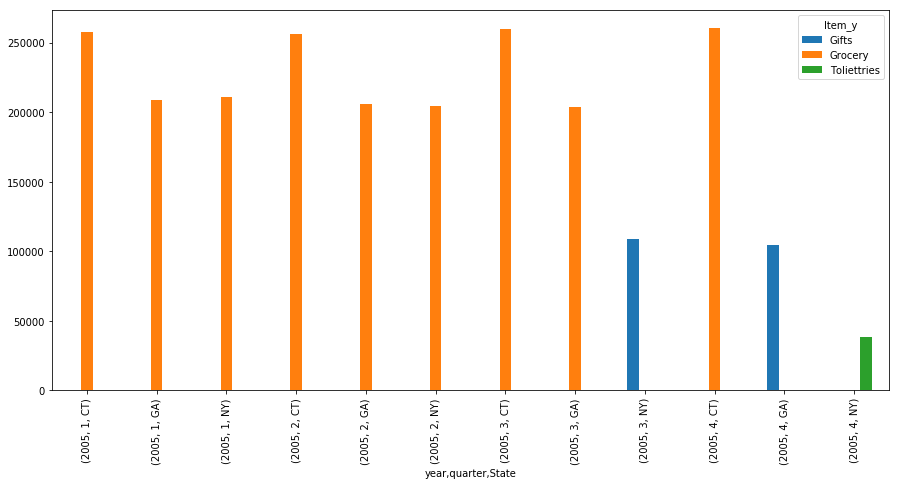

In [309]:
fig, ax = plt.subplots(figsize=(15,7))
result.groupby([result.year, result.quarter,result.State, result.Item_y])['derived'].sum().unstack().plot.bar(ax=ax)

### Which State is doing better for which Item in which Month...

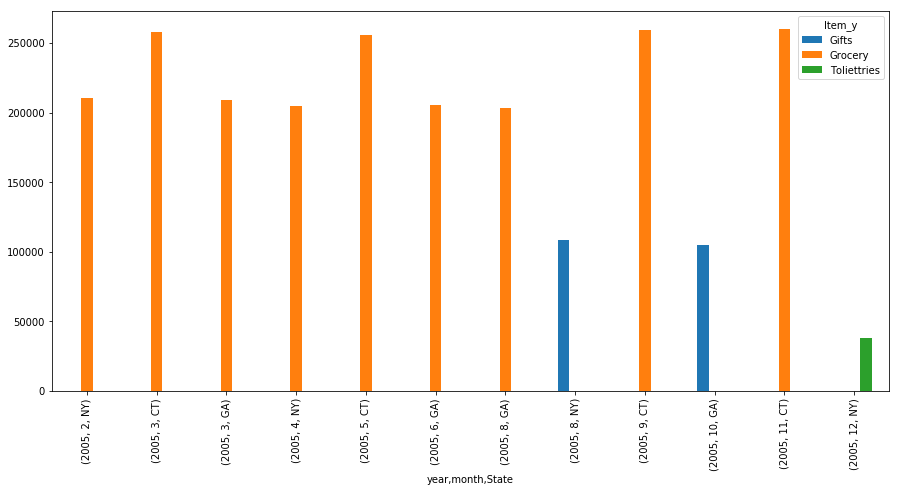

In [314]:
fig, ax = plt.subplots(figsize=(15,7))
result.groupby([result.year, result.month,result.State, result.Item_y])['derived'].sum().unstack().plot.bar(ax=ax)

### NOTE :- Above Visuals are done for Test Purpose. In Real Time, we usually copy these plots in ppt/Share the notebook to present the results and provide more granualarity that I am not providing.